In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import math

In [2]:
titanic_data = pd.read_csv('train.csv')

In [3]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
len(titanic_data)

891

In [5]:
len(titanic_data.columns)

12

In [6]:
titanic_data.shape

(891, 12)

In [7]:
print( 'The original number of passernger' + ' ' +str(len(titanic_data)))

The original number of passernger 891


---------------------------------

#### Analysis of data

--------------------------------------------


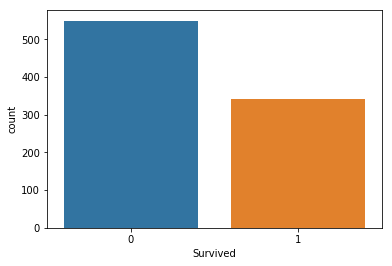

In [8]:
sns.countplot(x='Survived', data = titanic_data)

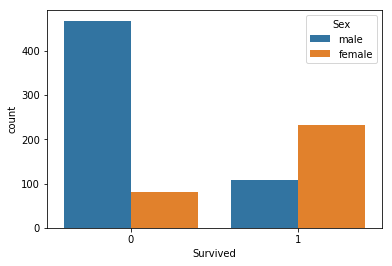

In [9]:
sns.countplot(x = 'Survived',hue='Sex',data = titanic_data)

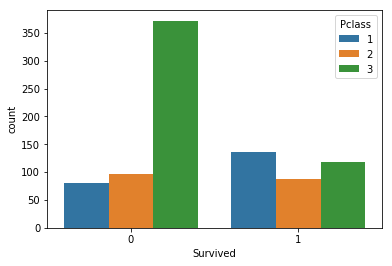

In [10]:
sns.countplot(x = 'Survived',hue = 'Pclass', data = titanic_data)

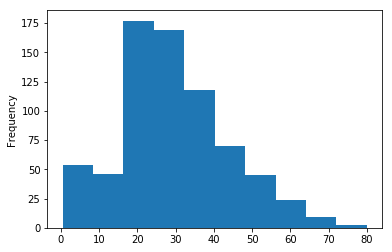

In [11]:
titanic_data['Age'].plot.hist()

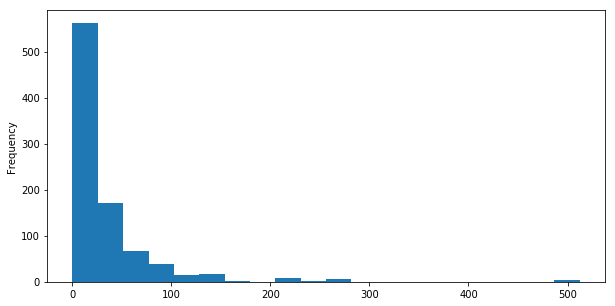

In [12]:
titanic_data['Fare'].plot.hist(bins= 20,figsize= (10,5))

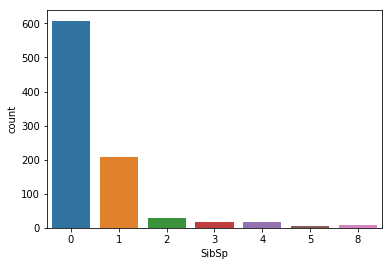

In [13]:
sns.countplot(x = 'SibSp',data = titanic_data)

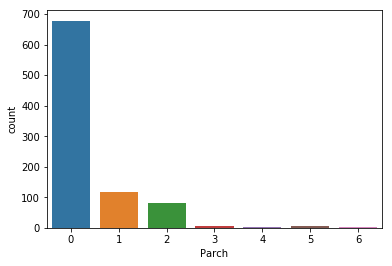

In [14]:
sns.countplot(x = 'Parch',data = titanic_data)

### Data Wrangling

-------------------------------------------------------------------------

In [15]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

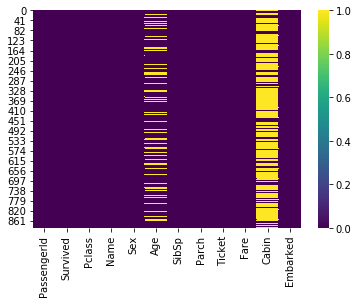

In [16]:
sns.heatmap(titanic_data.isnull(),cmap= 'viridis')

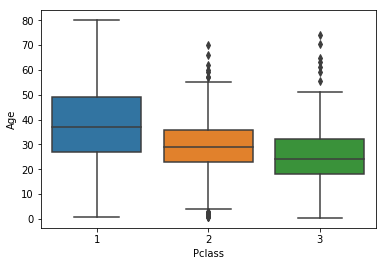

In [17]:
sns.boxplot(x = 'Pclass',y = 'Age',data= titanic_data)

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.drop ('Cabin',inplace = True,axis = 1)

In [5]:
len(titanic_data)

891

In [6]:
titanic_data.dropna(inplace = True)

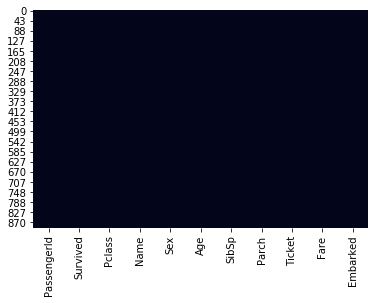

In [7]:
sns.heatmap(titanic_data.isnull(),cbar = False)

In [8]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
### Creating dummie vaiables

In [10]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first= True)

In [11]:
embark = pd.get_dummies(titanic_data['Embarked'], drop_first = True)

In [12]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [13]:
Pcl = pd.get_dummies(titanic_data['Pclass'], drop_first = True)

In [14]:
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [20]:
titanic_data = pd.concat([titanic_data,sex,embark,Pcl],axis = 1)

In [23]:
titanic_data.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis = 1,inplace= True)

In [26]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [25]:
titanic_data.drop('Pclass',axis = 1,inplace = True)

### Train Data
------------------------------------------------------------------------------------------

In [30]:
X = titanic_data.drop('Survived',axis = 1)
y = titanic_data['Survived']

In [29]:
from sklearn.cross_validation import train_test_split


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [33]:
from sklearn.linear_model import LogisticRegression

In [35]:
logmodel = LogisticRegression()

In [36]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
prediction = logmodel.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

In [39]:
classification_report(y_test,prediction)

'             precision    recall  f1-score   support\n\n          0       0.81      0.83      0.82       126\n          1       0.75      0.72      0.73        88\n\navg / total       0.78      0.79      0.78       214\n'

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test,prediction)

array([[105,  21],
       [ 25,  63]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,prediction)

0.7850467289719626